# Import data Sheppard_2020/tsukui:

In [18]:
import scanpy as sc
import scIB
import anndata
import glob
import os.path as path
import pandas as pd

In [4]:
base = "/mnt/scratch/tsukui/"

In [9]:
ts_mtx = glob.glob(base+'*mtx*')

In [27]:
ts_bleo = {}
for i in range(len(ts_mtx)):
    name = path.basename(ts_mtx[i])[:-14]
    print(name)
    base = path.dirname(ts_mtx[i])+"/"
    ts_bleo[name] = sc.read(base+name+'_matrix.mtx.gz').transpose()
    ts_bleo[name].obs = pd.read_csv(base+name+'_barcodes.tsv.gz', header=None, sep='\t', index_col=0, names=['barcode'])
    try:
        ts_bleo[name].var = pd.read_csv(base+name+'_genes.tsv.gz', header=None, sep='\t')
    except FileNotFoundError:
        ts_bleo[name].var = pd.read_csv(base+name+'_features.tsv.gz', header=None, sep='\t')
    ts_bleo[name].var.index = ts_bleo[name].var[1]
    

GSM3891620_NML1_Lin
GSM3891621_NML1_All
GSM3891622_NML2_Lin
GSM3891623_NML2_All
GSM3891624_NML3_Lin
GSM3891625_NML3_All
GSM3891626_IPF1_Lin
GSM3891627_IPF1_All
GSM3891628_IPF2_Lin
GSM3891629_IPF2_All
GSM3891630_IPF3_Lin
GSM3891631_IPF3_All
GSM3891632_SCD1_Lin
GSM3891633_SCD1_All
GSM3891634_SCD2_Lin
GSM3891635_SCD2_All


In [53]:
for i in ts_bleo:
    ts_bleo[i].obs['sample_id']='_'.join(i.split('_')[1:])
    ts_bleo[i].obs['cond']=i.split('_')[1][:-1]
    ts_bleo[i].obs_names=ts_bleo[i].obs_names+ts_bleo[i].obs['sample_id']
    ts_bleo[i].var.index.name='gene'
    ts_bleo[i].var = ts_bleo[i].var.iloc[:,:-1]
    ts_bleo[i].var_names_make_unique()

Index(['AAACCTGAGAGACTAT-1NML1_LinNML1_LinNML1_Lin',
       'AAACCTGAGAGGTTGC-1NML1_LinNML1_LinNML1_Lin',
       'AAACCTGAGCCCAGCT-1NML1_LinNML1_LinNML1_Lin',
       'AAACCTGAGGCCATAG-1NML1_LinNML1_LinNML1_Lin',
       'AAACCTGCAATTCCTT-1NML1_LinNML1_LinNML1_Lin',
       'AAACCTGCACAAGACG-1NML1_LinNML1_LinNML1_Lin',
       'AAACCTGCACAGCCCA-1NML1_LinNML1_LinNML1_Lin',
       'AAACCTGCACCATCCT-1NML1_LinNML1_LinNML1_Lin',
       'AAACCTGCAGAGCCAA-1NML1_LinNML1_LinNML1_Lin',
       'AAACCTGCAGTCGATT-1NML1_LinNML1_LinNML1_Lin',
       ...
       'TTTGTCACATGTCCTC-1NML1_LinNML1_LinNML1_Lin',
       'TTTGTCAGTCTCTCGT-1NML1_LinNML1_LinNML1_Lin',
       'TTTGTCAGTCTGCCAG-1NML1_LinNML1_LinNML1_Lin',
       'TTTGTCAGTGGACGAT-1NML1_LinNML1_LinNML1_Lin',
       'TTTGTCAGTTATCCGA-1NML1_LinNML1_LinNML1_Lin',
       'TTTGTCATCATCGCTC-1NML1_LinNML1_LinNML1_Lin',
       'TTTGTCATCGGTTCGG-1NML1_LinNML1_LinNML1_Lin',
       'TTTGTCATCTCCAGGG-1NML1_LinNML1_LinNML1_Lin',
       'TTTGTCATCTCTGCTG-1NML1_LinN

In [58]:
adata = anndata.concat(ts_bleo)

In [65]:
adata.obs_names= adata.obs_names.str[:16]

In [66]:
adata.obs_names_make_unique()

In [69]:
scIB.pp.summarize_counts(adata)

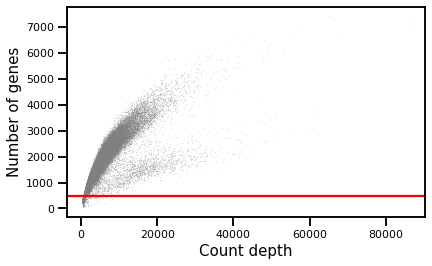

Counts Threshold: (0, 46000)


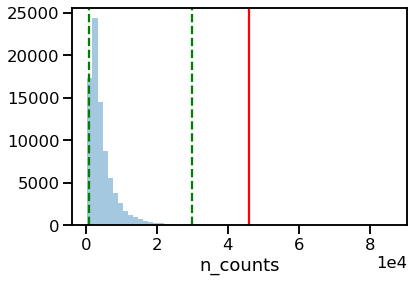

upper threshold: 46000


/home/daniel/.conda/envs/scop/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


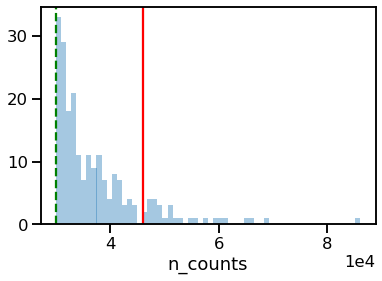

Gene Threshold: (500, 5000)


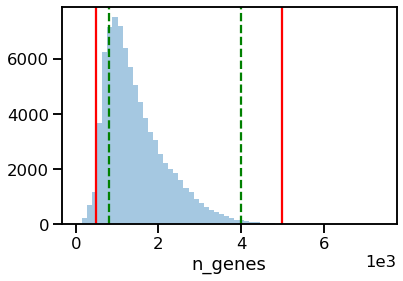

lower threshold: 500


/home/daniel/.conda/envs/scop/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


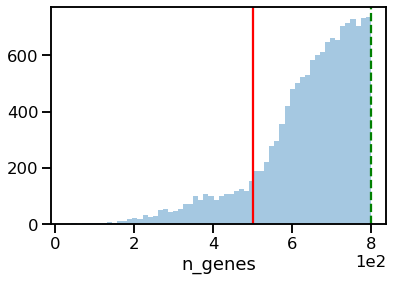

upper threshold: 5000


/home/daniel/.conda/envs/scop/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


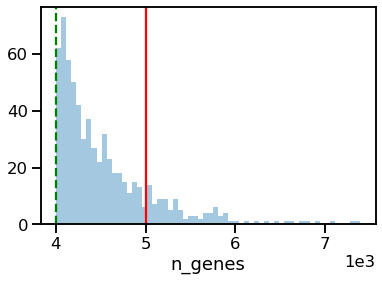

In [82]:
scIB.pp.plot_QC(adata, gene_threshold=(800,4000), count_threshold=(1000,30000), count_filter_threshold=(0,46000), gene_filter_threshold=(500,5000))

In [83]:
adata

AnnData object with n_obs × n_vars = 83704 × 33694
    obs: 'sample_id', 'cond', 'n_counts', 'log_counts', 'n_genes', 'percent_mito'

In [84]:
sc.pp.filter_cells(adata,min_genes=480)

/home/daniel/.conda/envs/scop/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [85]:
adata

AnnData object with n_obs × n_vars = 82047 × 33694
    obs: 'sample_id', 'cond', 'n_counts', 'log_counts', 'n_genes', 'percent_mito'

In [86]:
sc.pp.filter_cells(adata, max_counts=46000)

In [87]:
adata

AnnData object with n_obs × n_vars = 82018 × 33694
    obs: 'sample_id', 'cond', 'n_counts', 'log_counts', 'n_genes', 'percent_mito'

In [88]:
sc.pp.filter_genes(adata, min_counts=1)

In [104]:
adata.obs['study']='Sheppard2020'
adata.obs['dataset']='Sheppard2020'

In [99]:
adata.obs['condition']=adata.obs.cond

In [107]:
adata.obs['subject_ID']= adata.obs.sample_id.str.split('_').str[0]

In [111]:
adata.obs.rename({'sample_id':'sample'}, axis=1, inplace=True)

In [112]:
adata.obs.drop(['cond', 'n_counts', 'log_counts', 'n_genes', 'percent_mito'], axis=1)

,sample,condition,study,dataset,subject_ID
AAACCTGAGAGACTAT,NML1_Lin,NML,Sheppard2020,Sheppard2020,NML1
AAACCTGAGAGGTTGC,NML1_Lin,NML,Sheppard2020,Sheppard2020,NML1
AAACCTGAGCCCAGCT,NML1_Lin,NML,Sheppard2020,Sheppard2020,NML1
AAACCTGAGGCCATAG,NML1_Lin,NML,Sheppard2020,Sheppard2020,NML1
AAACCTGCAATTCCTT,NML1_Lin,NML,Sheppard2020,Sheppard2020,NML1
...,...,...,...,...,...
TTTGGTTTCAGCGATT,SCD2_All,SCD,Sheppard2020,Sheppard2020,SCD2
TTTGGTTTCTAAGCCA,SCD2_All,SCD,Sheppard2020,Sheppard2020,SCD2
TTTGTCAAGGTCATCT,SCD2_All,SCD,Sheppard2020,Sheppard2020,SCD2
TTTGTCACAAGGACAC,SCD2_All,SCD,Sheppard2020,Sheppard2020,SCD2


In [113]:
adata.write('/mnt/scratch/tsukui.h5ad')

... storing 'study' as categorical
... storing 'dataset' as categorical
... storing 'subject_ID' as categorical


# Map labels and metadata from Sheppard lab shared object

In [1]:
import scanpy as sc
import numpy as np
import pandas as pd

In [2]:
adata = sc.read('../../../data/HLCA_extended/extension_datasets/ready/full/tsukui.h5ad')
adata_ann = sc.read('../../../data/HLCA_extended/extension_datasets/raw/Tsukui/HumanAllCellsOnlyTop2000genesAnnotated.h5ad')

In [3]:
adata
adata_ann

AnnData object with n_obs × n_vars = 82018 × 27147
    obs: 'sample', 'cond', 'n_counts', 'log_counts', 'n_genes', 'percent_mito', 'condition', 'study', 'dataset', 'subject_ID'
    var: 'n_counts'

AnnData object with n_obs × n_vars = 83316 × 2000
    obs: 'orig.ident', 'res.0.3', 'ID', 'disease', 'type', 'sample', 'sort', 'nCount_RNA', 'nFeature_RNA', 'ident'
    obsm: 'MNN', 'X_tsne', 'X_umap'
    layers: 'logcounts'

In [4]:
adata.obs_names
adata_ann.obs_names

Index(['AAACCTGAGAGACTAT', 'AAACCTGAGAGGTTGC', 'AAACCTGAGCCCAGCT',
       'AAACCTGAGGCCATAG', 'AAACCTGCAATTCCTT', 'AAACCTGCACAAGACG',
       'AAACCTGCACAGCCCA', 'AAACCTGCACCATCCT', 'AAACCTGCAGAGCCAA',
       'AAACCTGCAGTCGATT',
       ...
       'TTTGGTTCATAAAGGT', 'TTTGGTTCATCGTCGG-1', 'TTTGGTTGTACCTACA',
       'TTTGGTTGTGTCTGAT', 'TTTGGTTGTGTTGAGG', 'TTTGGTTTCAGCGATT',
       'TTTGGTTTCTAAGCCA', 'TTTGTCAAGGTCATCT', 'TTTGTCACAAGGACAC',
       'TTTGTCATCTTCGAGA'],
      dtype='object', length=82018)

Index(['AAACCTGAGCGATTCT_Fibrosis_Lin_IPF-1',
       'AAACCTGAGTAGATGT_Fibrosis_Lin_IPF-1',
       'AAACCTGCAACTGCGC_Fibrosis_Lin_IPF-1',
       'AAACCTGCACCACGTG_Fibrosis_Lin_IPF-1',
       'AAACCTGCAGCTCGCA_Fibrosis_Lin_IPF-1',
       'AAACCTGCATCCCACT_Fibrosis_Lin_IPF-1',
       'AAACCTGCATTCTCAT_Fibrosis_Lin_IPF-1',
       'AAACCTGGTAGCCTCG_Fibrosis_Lin_IPF-1',
       'AAACCTGGTATAGTAG_Fibrosis_Lin_IPF-1',
       'AAACGGGAGCTAGGCA_Fibrosis_Lin_IPF-1',
       ...
       'TTTGTCACACCGAATT_Normal_WH_NML-3', 'TTTGTCACATGTAGTC_Normal_WH_NML-3',
       'TTTGTCACATTACCTT_Normal_WH_NML-3', 'TTTGTCAGTACGCTGC_Normal_WH_NML-3',
       'TTTGTCAGTAGAGTGC_Normal_WH_NML-3', 'TTTGTCAGTGATGTGG_Normal_WH_NML-3',
       'TTTGTCAGTGCCTGTG_Normal_WH_NML-3', 'TTTGTCAGTGTTTGGT_Normal_WH_NML-3',
       'TTTGTCAGTTAGGGTG_Normal_WH_NML-3', 'TTTGTCATCCCATTTA_Normal_WH_NML-3'],
      dtype='object', length=83316)

### Match obs names

In [15]:
adata.obs
adata_ann.obs

,sample,cond,n_counts,log_counts,n_genes,percent_mito,condition,study,dataset,subject_ID
AAACCTGAGAGACTAT,NML1_Lin,NML,2908.0,7.975221,1315,0.024415,NML,Sheppard2020,Sheppard2020,NML1
AAACCTGAGAGGTTGC,NML1_Lin,NML,2091.0,7.645398,1007,0.029651,NML,Sheppard2020,Sheppard2020,NML1
AAACCTGAGCCCAGCT,NML1_Lin,NML,2164.0,7.679714,1112,0.012477,NML,Sheppard2020,Sheppard2020,NML1
AAACCTGAGGCCATAG,NML1_Lin,NML,1696.0,7.436028,900,0.021816,NML,Sheppard2020,Sheppard2020,NML1
AAACCTGCAATTCCTT,NML1_Lin,NML,1323.0,7.187657,671,0.037037,NML,Sheppard2020,Sheppard2020,NML1
...,...,...,...,...,...,...,...,...,...,...
TTTGGTTTCAGCGATT,SCD2_All,SCD,3133.0,8.049747,1115,0.039579,SCD,Sheppard2020,Sheppard2020,SCD2
TTTGGTTTCTAAGCCA,SCD2_All,SCD,30914.0,10.338964,2978,0.007666,SCD,Sheppard2020,Sheppard2020,SCD2
TTTGTCAAGGTCATCT,SCD2_All,SCD,6122.0,8.719645,1840,0.045410,SCD,Sheppard2020,Sheppard2020,SCD2
TTTGTCACAAGGACAC,SCD2_All,SCD,6785.0,8.822470,2001,0.025350,SCD,Sheppard2020,Sheppard2020,SCD2


,orig.ident,res.0.3,ID,disease,type,sample,sort,nCount_RNA,nFeature_RNA,ident
AAACCTGAGCGATTCT_Fibrosis_Lin_IPF-1,hWholeLung,1,IPF-1,IPF,Fibrosis,Lineage-,L_IPF-1,735.092099,1008,Col1+
AAACCTGAGTAGATGT_Fibrosis_Lin_IPF-1,hWholeLung,0,IPF-1,IPF,Fibrosis,Lineage-,L_IPF-1,656.133473,831,Col1+
AAACCTGCAACTGCGC_Fibrosis_Lin_IPF-1,hWholeLung,8,IPF-1,IPF,Fibrosis,Lineage-,L_IPF-1,750.925836,1166,Col1+
AAACCTGCACCACGTG_Fibrosis_Lin_IPF-1,hWholeLung,0,IPF-1,IPF,Fibrosis,Lineage-,L_IPF-1,739.868526,1047,Col1+
AAACCTGCAGCTCGCA_Fibrosis_Lin_IPF-1,hWholeLung,1,IPF-1,IPF,Fibrosis,Lineage-,L_IPF-1,673.766814,757,Col1+
...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTGATGTGG_Normal_WH_NML-3,hWholeLung,10,NML-3,Normal,Normal,Whole,W_NML-3,459.808913,490,T cell
TTTGTCAGTGCCTGTG_Normal_WH_NML-3,hWholeLung,6,NML-3,Normal,Normal,Whole,W_NML-3,515.341066,420,Endothelial
TTTGTCAGTGTTTGGT_Normal_WH_NML-3,hWholeLung,5,NML-3,Normal,Normal,Whole,W_NML-3,694.500782,764,Macrophage
TTTGTCAGTTAGGGTG_Normal_WH_NML-3,hWholeLung,5,NML-3,Normal,Normal,Whole,W_NML-3,680.536308,717,Macrophage


In [16]:
# adata obs names
t1 = ['_'.join([i.split('-')[0],adata.obs['subject_ID'][i]]) for i in adata.obs_names]

In [30]:
# adata_ann obs names
t2 = ['_'.join([i.split('_')[0], i.split('_')[3]]).replace('-','') for i in adata_ann.obs_names]

In [41]:
common_obs = list(set(t2).intersection(t1))
len(common_obs)

80020

In [35]:
adata.obs_names = t1
adata_ann.obs_names = t2

In [36]:
adata_ann.var_names
adata.var_names

Index(['MT2A', 'IGFBP7', 'TAGLN', 'LUM', 'HLA-DRA', 'FTL', 'IGKC', 'MGP',
       'DCN', 'ACTA2',
       ...
       'SRRM1', 'SYTL1', 'HRH2', 'SNRPG', 'NR3C1', 'ATP5A1', 'TXNDC17',
       'CCDC71L', 'CTNNAL1', 'ACSL4'],
      dtype='object', length=2000)

Index(['RP11-34P13.7', 'RP11-34P13.8', 'RP11-34P13.9', 'FO538757.3',
       'FO538757.2', 'AP006222.2', 'RP4-669L17.2', 'RP4-669L17.10',
       'RP5-857K21.4', 'RP11-206L10.4',
       ...
       'AL592183.1', 'AC007325.1', 'AC007325.4', 'AC007325.2', 'AL354822.1',
       'AC023491.2', 'AC004556.1', 'AC233755.2', 'AC233755.1', 'AC240274.1'],
      dtype='object', name='gene', length=27147)

### Map obs

In [38]:
adata.obs
adata_ann.obs

,sample,cond,n_counts,log_counts,n_genes,percent_mito,condition,study,dataset,subject_ID
AAACCTGAGAGACTAT_NML1,NML1_Lin,NML,2908.0,7.975221,1315,0.024415,NML,Sheppard2020,Sheppard2020,NML1
AAACCTGAGAGGTTGC_NML1,NML1_Lin,NML,2091.0,7.645398,1007,0.029651,NML,Sheppard2020,Sheppard2020,NML1
AAACCTGAGCCCAGCT_NML1,NML1_Lin,NML,2164.0,7.679714,1112,0.012477,NML,Sheppard2020,Sheppard2020,NML1
AAACCTGAGGCCATAG_NML1,NML1_Lin,NML,1696.0,7.436028,900,0.021816,NML,Sheppard2020,Sheppard2020,NML1
AAACCTGCAATTCCTT_NML1,NML1_Lin,NML,1323.0,7.187657,671,0.037037,NML,Sheppard2020,Sheppard2020,NML1
...,...,...,...,...,...,...,...,...,...,...
TTTGGTTTCAGCGATT_SCD2,SCD2_All,SCD,3133.0,8.049747,1115,0.039579,SCD,Sheppard2020,Sheppard2020,SCD2
TTTGGTTTCTAAGCCA_SCD2,SCD2_All,SCD,30914.0,10.338964,2978,0.007666,SCD,Sheppard2020,Sheppard2020,SCD2
TTTGTCAAGGTCATCT_SCD2,SCD2_All,SCD,6122.0,8.719645,1840,0.045410,SCD,Sheppard2020,Sheppard2020,SCD2
TTTGTCACAAGGACAC_SCD2,SCD2_All,SCD,6785.0,8.822470,2001,0.025350,SCD,Sheppard2020,Sheppard2020,SCD2


,orig.ident,res.0.3,ID,disease,type,sample,sort,nCount_RNA,nFeature_RNA,ident
AAACCTGAGCGATTCT_IPF1,hWholeLung,1,IPF-1,IPF,Fibrosis,Lineage-,L_IPF-1,735.092099,1008,Col1+
AAACCTGAGTAGATGT_IPF1,hWholeLung,0,IPF-1,IPF,Fibrosis,Lineage-,L_IPF-1,656.133473,831,Col1+
AAACCTGCAACTGCGC_IPF1,hWholeLung,8,IPF-1,IPF,Fibrosis,Lineage-,L_IPF-1,750.925836,1166,Col1+
AAACCTGCACCACGTG_IPF1,hWholeLung,0,IPF-1,IPF,Fibrosis,Lineage-,L_IPF-1,739.868526,1047,Col1+
AAACCTGCAGCTCGCA_IPF1,hWholeLung,1,IPF-1,IPF,Fibrosis,Lineage-,L_IPF-1,673.766814,757,Col1+
...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTGATGTGG_NML3,hWholeLung,10,NML-3,Normal,Normal,Whole,W_NML-3,459.808913,490,T cell
TTTGTCAGTGCCTGTG_NML3,hWholeLung,6,NML-3,Normal,Normal,Whole,W_NML-3,515.341066,420,Endothelial
TTTGTCAGTGTTTGGT_NML3,hWholeLung,5,NML-3,Normal,Normal,Whole,W_NML-3,694.500782,764,Macrophage
TTTGTCAGTTAGGGTG_NML3,hWholeLung,5,NML-3,Normal,Normal,Whole,W_NML-3,680.536308,717,Macrophage


In [52]:
adata.obs_names_make_unique()

In [53]:
adata = adata[common_obs,:].copy()

/home/icb/malte.luecken/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2492: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [56]:
adata_ann.obs_names_make_unique()
adata_ann = adata_ann[common_obs,:].copy()

In [57]:
adata
adata_ann

AnnData object with n_obs × n_vars = 80020 × 27147
    obs: 'sample', 'cond', 'n_counts', 'log_counts', 'n_genes', 'percent_mito', 'condition', 'study', 'dataset', 'subject_ID'
    var: 'n_counts'

AnnData object with n_obs × n_vars = 80020 × 2000
    obs: 'orig.ident', 'res.0.3', 'ID', 'disease', 'type', 'sample', 'sort', 'nCount_RNA', 'nFeature_RNA', 'ident'
    obsm: 'MNN', 'X_tsne', 'X_umap'
    layers: 'logcounts'

In [58]:
adata_ann.obs.head()

,orig.ident,res.0.3,ID,disease,type,sample,sort,nCount_RNA,nFeature_RNA,ident
TCGTACCCATGATCCA_SCD1,hWholeLung,1,SCD-1,Scleroderma,Fibrosis,Lineage-,L_SCD-1,667.162184,616,Col1+
TGAGCATGTTGCCTCT_IPF3,hWholeLung,1,IPF-3,IPF,Fibrosis,Lineage-,L_IPF-3,597.799093,480,Col1+
AACCATGGTGGTCCGT_IPF3,hWholeLung,2,IPF-3,IPF,Fibrosis,Lineage-,L_IPF-3,647.678173,521,Col1+
CGTCCATTCGCCCTTA_SCD1,hWholeLung,0,SCD-1,Scleroderma,Fibrosis,Lineage-,L_SCD-1,683.464323,633,Col1+
AAGGAGCGTGGTTTCA_SCD1,hWholeLung,2,SCD-1,Scleroderma,Fibrosis,Lineage-,L_SCD-1,681.634004,606,Col1+


In [59]:
for col in adata_ann.obs.columns:
    print(col)
    adata_ann.obs[col].value_counts()

orig.ident


hWholeLung    80020
Name: orig.ident, dtype: int64

res.0.3


0     12650
1     12580
2      9990
3      9472
4      7128
5      6662
6      4966
7      3634
8      3570
9      2929
10     2528
11     1107
12      693
13      626
14      475
15      418
16      256
17      173
18      121
19       42
Name: res.0.3, dtype: int64

ID


IPF-3    20120
NML-1    12804
SCD-1    11272
IPF-2     9329
NML-2     8672
SCD-2     7145
NML-3     6310
IPF-1     4368
Name: ID, dtype: int64

disease


IPF            33817
Normal         27786
Scleroderma    18417
Name: disease, dtype: int64

type


Fibrosis    52234
Normal      27786
Name: type, dtype: int64

sample


Lineage-    49883
Whole       30137
Name: sample, dtype: int64

sort


L_IPF-3    12463
L_NML-1     9191
L_SCD-1     8684
W_IPF-3     7657
L_IPF-2     5920
W_SCD-2     4775
L_NML-2     4648
L_IPF-1     4368
W_NML-3     4071
W_NML-2     4024
W_NML-1     3613
W_IPF-2     3409
W_SCD-1     2588
L_SCD-2     2370
L_NML-3     2239
Name: sort, dtype: int64

nCount_RNA


650.123104    1
600.488823    1
566.360540    1
668.254433    1
588.410060    1
             ..
735.954231    1
539.221101    1
695.655565    1
622.480802    1
672.157128    1
Name: nCount_RNA, Length: 80020, dtype: int64

nFeature_RNA


549     187
529     181
653     180
532     176
535     175
       ... 
1384      1
188       1
1467      1
1339      1
1471      1
Name: nFeature_RNA, Length: 1136, dtype: int64

ident


Col1+             52314
Macrophage        13790
Endothelial        5008
Epithelial         3660
T cell             2701
B cell             1733
Dendritic cell      814
Name: ident, dtype: int64

In [60]:
for col in adata.obs.columns:
    print(col)
    adata.obs[col].value_counts()

sample


IPF3_Lin    12456
NML1_Lin     9191
SCD1_Lin     8684
IPF3_All     7664
IPF2_Lin     5920
SCD2_All     4775
NML2_Lin     4648
IPF1_Lin     4368
NML3_All     4071
NML2_All     4024
NML1_All     3613
IPF2_All     3409
SCD1_All     2588
SCD2_Lin     2370
NML3_Lin     2239
Name: sample, dtype: int64

cond


IPF    33817
NML    27786
SCD    18417
Name: cond, dtype: int64

n_counts


1216.0     36
1872.0     34
1998.0     33
2227.0     32
1854.0     32
           ..
18481.0     1
712.0       1
8863.0      1
7864.0      1
18233.0     1
Name: n_counts, Length: 13911, dtype: int64

log_counts


7.103322    36
7.534763    34
7.599902    33
7.345365    32
7.579168    32
            ..
9.370502     1
9.746834     1
9.259892     1
9.072112     1
9.358588     1
Name: log_counts, Length: 13911, dtype: int64

n_genes


1007    84
832     82
895     82
777     80
920     78
        ..
4617     1
3884     1
3948     1
4425     1
4258     1
Name: n_genes, Length: 3817, dtype: int64

percent_mito


0.000000    89
0.038462    28
0.028571    27
0.027027    26
0.026316    25
            ..
0.027885     1
0.025834     1
0.019805     1
0.042315     1
0.042526     1
Name: percent_mito, Length: 67742, dtype: int64

condition


IPF    33817
NML    27786
SCD    18417
Name: condition, dtype: int64

study


Sheppard2020    80020
Name: study, dtype: int64

dataset


Sheppard2020    80020
Name: dataset, dtype: int64

subject_ID


IPF3    20120
NML1    12804
SCD1    11272
IPF2     9329
NML2     8672
SCD2     7145
NML3     6310
IPF1     4368
Name: subject_ID, dtype: int64

In [61]:
adata.obs['original_celltype_ann'] = adata_ann.obs['ident']


# Prune anndata obs and save full object

In [62]:
adata.obs

,sample,cond,n_counts,log_counts,n_genes,percent_mito,condition,study,dataset,subject_ID,original_celltype_ann
TCGTACCCATGATCCA_SCD1,SCD1_Lin,SCD,3377.0,8.124743,1349,0.031389,SCD,Sheppard2020,Sheppard2020,SCD1,Col1+
TGAGCATGTTGCCTCT_IPF3,IPF3_Lin,IPF,2171.0,7.682943,901,0.031322,IPF,Sheppard2020,Sheppard2020,IPF3,Col1+
AACCATGGTGGTCCGT_IPF3,IPF3_Lin,IPF,2299.0,7.740230,921,0.026533,IPF,Sheppard2020,Sheppard2020,IPF3,Col1+
CGTCCATTCGCCCTTA_SCD1,SCD1_Lin,SCD,3131.0,8.049108,1301,0.010220,SCD,Sheppard2020,Sheppard2020,SCD1,Col1+
AAGGAGCGTGGTTTCA_SCD1,SCD1_Lin,SCD,2978.0,7.999007,1260,0.026528,SCD,Sheppard2020,Sheppard2020,SCD1,Col1+
...,...,...,...,...,...,...,...,...,...,...,...
AGCAGCCAGTACGCCC_IPF3,IPF3_Lin,IPF,1582.0,7.366445,653,0.019595,IPF,Sheppard2020,Sheppard2020,IPF3,Col1+
TCAGCTCTCTAGCACA_IPF3,IPF3_Lin,IPF,2099.0,7.649216,803,0.056217,IPF,Sheppard2020,Sheppard2020,IPF3,Col1+
CGAATGTAGTGGTAAT_NML3,NML3_All,NML,2597.0,7.862112,875,0.018868,NML,Sheppard2020,Sheppard2020,NML3,Macrophage
GTCATTTTCTTAGAGC_IPF3,IPF3_Lin,IPF,2119.0,7.658700,941,0.024540,IPF,Sheppard2020,Sheppard2020,IPF3,Col1+


In [64]:
adata.obs = adata.obs.drop(columns=['log_counts'])

In [66]:
adata.write('../../../data/HLCA_extended/extension_datasets/ready/full/tsukui.h5ad')

# Subset data

In [67]:
gene_set = pd.read_csv('genes_for_mapping.csv')

In [68]:
cd ../scripts

/mnt/znas/icb_zstore01/groups/ml01/workspace/hlca_lisa.sikkema_malte.luecken/scripts


In [69]:
import preprocessing as pp

In [70]:
cd ../query_datasets/

/mnt/znas/icb_zstore01/groups/ml01/workspace/hlca_lisa.sikkema_malte.luecken/query_datasets


In [71]:
adata_sub = pp.subset_and_pad_adata(gene_set, adata)

/home/icb/malte.luecken/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2492: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


not all genes were recovered, filling in 0 counts for 15 missing genes...


In [72]:
adata_sub

AnnData object with n_obs × n_vars = 80020 × 2000
    obs: 'sample', 'cond', 'n_counts', 'n_genes', 'percent_mito', 'condition', 'study', 'dataset', 'subject_ID', 'original_celltype_ann'
    var: 'n_counts', 'gene_symbols', 'ensembl'

In [73]:
adata_sub.write('../../../data/HLCA_extended/extension_datasets/ready/subsetted/tsukui_sub.h5ad')

... storing 'gene_symbols' as categorical
